# Proyecto: Análisis exploratorio de datos

## Llamando librerias que voy a utilizar

In [124]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
from rpy2.robjects.packages import importr

## Establecer apariencia general de los gráficos

In [20]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Carga de datos

In [21]:
preprocessed_penguins_df = sns.load_dataset("penguins")
preprocessed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Colecta y validación de datos

### ¿Que tipos de datos tengo?

In [25]:
preprocessed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### ¿Cuantas variables tengo de cada tipo?

In [29]:
preprocessed_penguins_df.dtypes.value_counts()

float64    4
object     3
Name: count, dtype: int64

¿Cuantas cariables y observaciones tengo?

In [31]:
preprocessed_penguins_df.shape

(344, 7)

### ¿Hay valores nulos?

In [32]:
preprocessed_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

### ¿Cuantos valores nulos?

In [33]:
preprocessed_penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### ¿Cual es la proporción de los valores nulos?

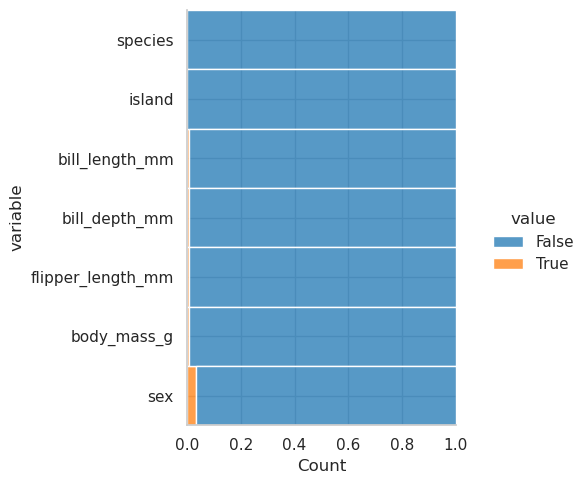

In [37]:
preprocessed_penguins_df.isnull().melt().pipe(lambda df: (sns.displot(data=df, y='variable', hue='value', multiple='fill')))

### Visualizando los valores nulos

<Axes: >

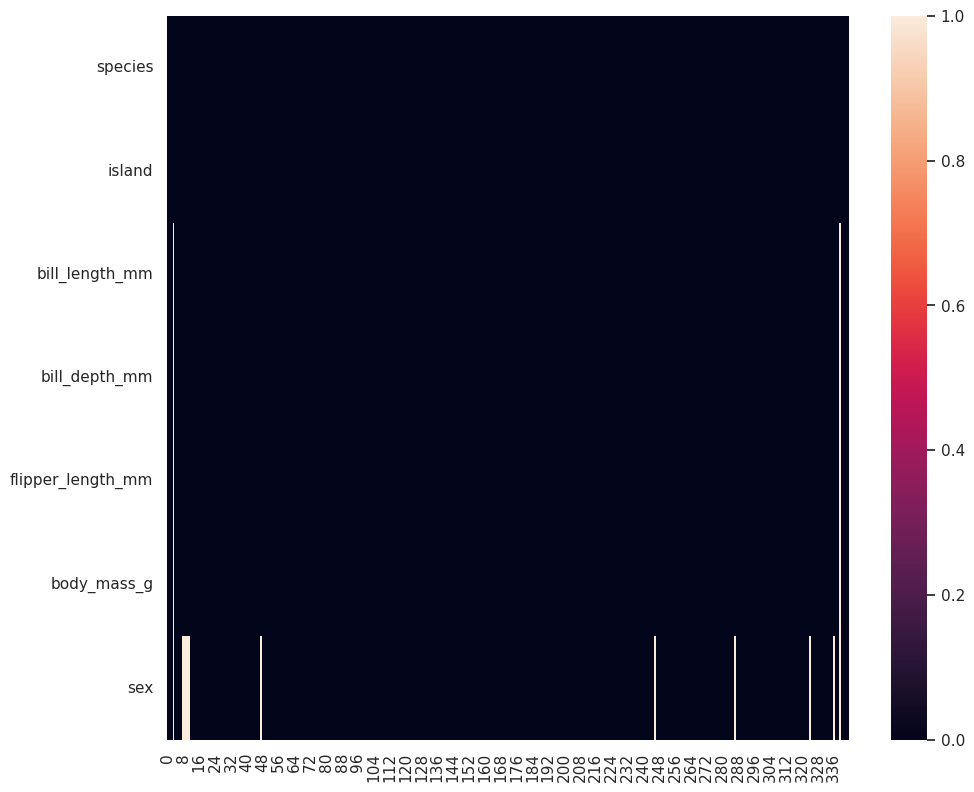

In [39]:
preprocessed_penguins_df.isnull().transpose().pipe(lambda df: sns.heatmap(data=df))

Son muy pocos, eliminelos.

### Datos procesados:

In [43]:
processed_penguins_df = preprocessed_penguins_df.dropna()
processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Conteos y proporciones

In [48]:
processed_penguins_df.describe(include='all') #! include='all' para que me describa tambien las variables no numericas

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


solo numericas

In [49]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


solo categoricas

In [50]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


categorias mas especificas

In [54]:
processed_penguins_df.astype( {'species': 'category','island': 'category'}).describe(include=['category'])

,species,island
count,333,333
unique,3,3
top,Adelie,Biscoe
freq,146,163


### Visualizando conteo

In [55]:
processed_penguins_df.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

/tmp/ipykernel_14006/2867932902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=processed_penguins_df, x='species', kind='count', palette=penguin_color)


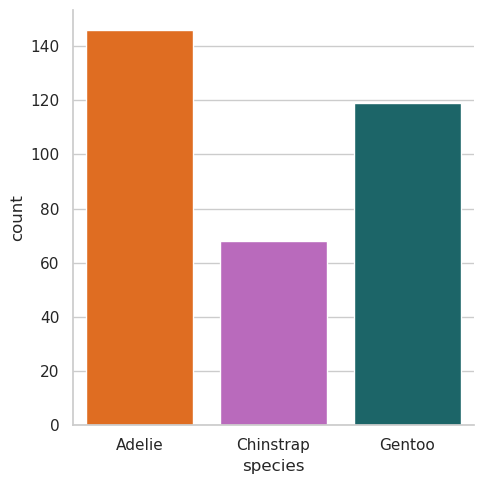

In [58]:
sns.catplot(data=processed_penguins_df, x='species', kind='count', palette=penguin_color)

### Visualizando proporciones

/root/anaconda3/envs/AnExpDat/lib/python3.12/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.assign` instead.
  return method(self._obj, *args, **kwargs)


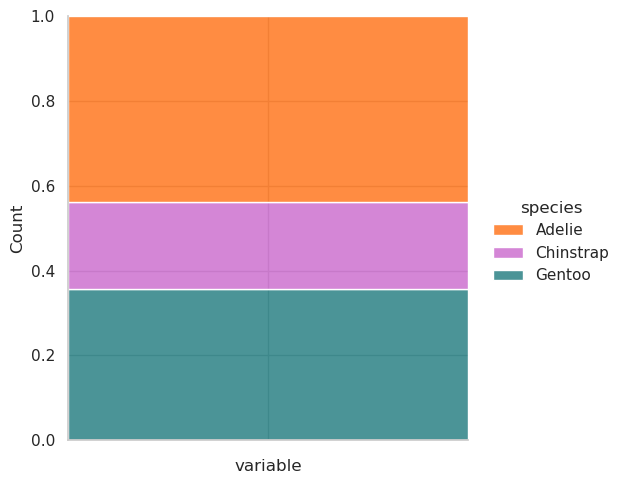

In [61]:
processed_penguins_df.add_column('variable', '').pipe(lambda df: (    sns.displot(data=df,x='variable',hue='species',multiple='fill',palette=penguin_color))) #* meh

## Medidas de tendencia central

### Media

In [68]:
preprocessed_penguins_df.mean(numeric_only = True)

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

### Mediana

In [69]:
processed_penguins_df.median(numeric_only = True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

### Moda

In [70]:
processed_penguins_df.mode(numeric_only = True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,41.1,17.0,190.0,3800.0


In [74]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,Male


### Descripción general

In [75]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


## Medidas de dispersión

### Rango

In [78]:
processed_penguins_df.max(numeric_only=True)-processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

### Desviación estandar

In [81]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

### Rango intercuartilico

In [84]:
processed_penguins_df.quantile(0.75, numeric_only=True) - processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [88]:
processed_penguins_df.quantile(q=[0.75,0.5,0.25], numeric_only=True).transpose().rename_axis('variable').reset_index().assign(iqr = lambda df : df[0.75]-df[0.25])

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0


In [120]:
processed_penguins_df['flipper_length_mm'].mode()

0    190.0
Name: flipper_length_mm, dtype: float64

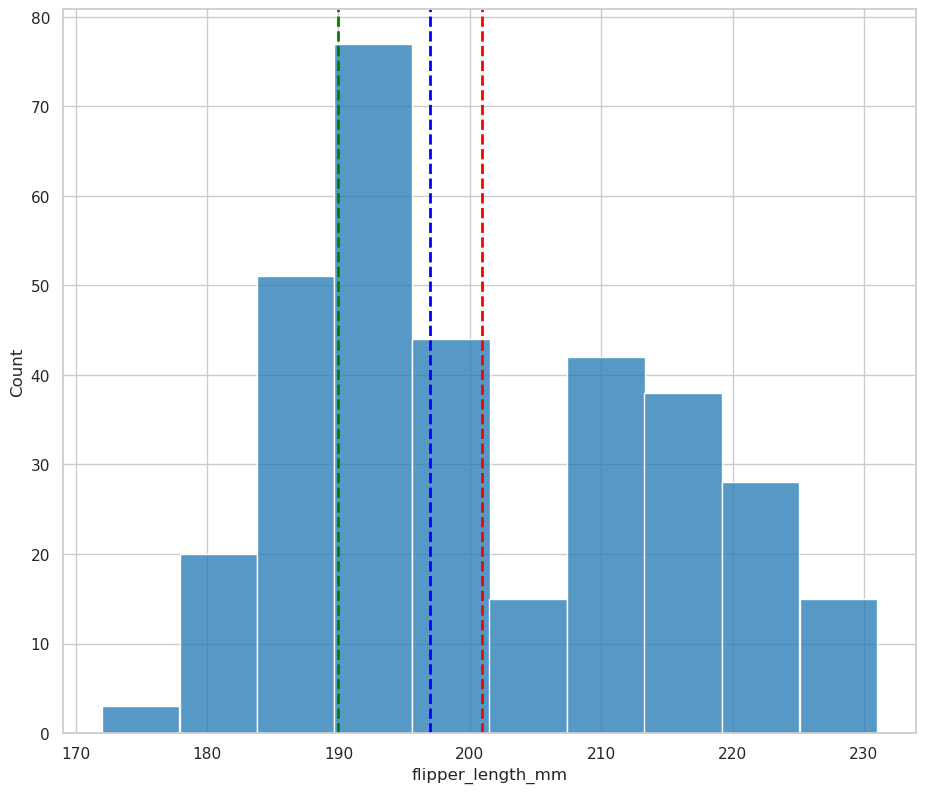

In [129]:
sns.histplot(data=processed_penguins_df, x='flipper_length_mm')
plt.axvline(x=processed_penguins_df.flipper_length_mm.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=processed_penguins_df.flipper_length_mm.median(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(x=190, color='green', linestyle='dashed', linewidth=2)

<Axes: xlabel='flipper_length_mm', ylabel='sex'>

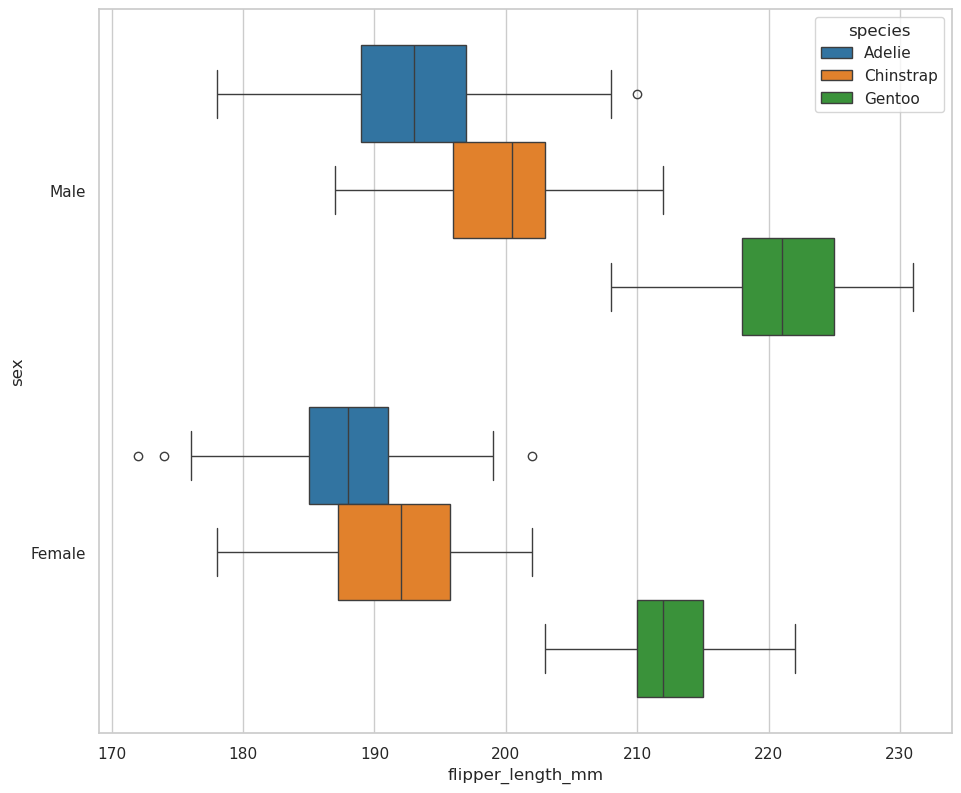

In [134]:
sns.boxplot(data=processed_penguins_df, x='flipper_length_mm', hue='species', y='sex')

## Distribuciones: PMFs, CDFs y PDFs

### Funciones de densidad:

#### Seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

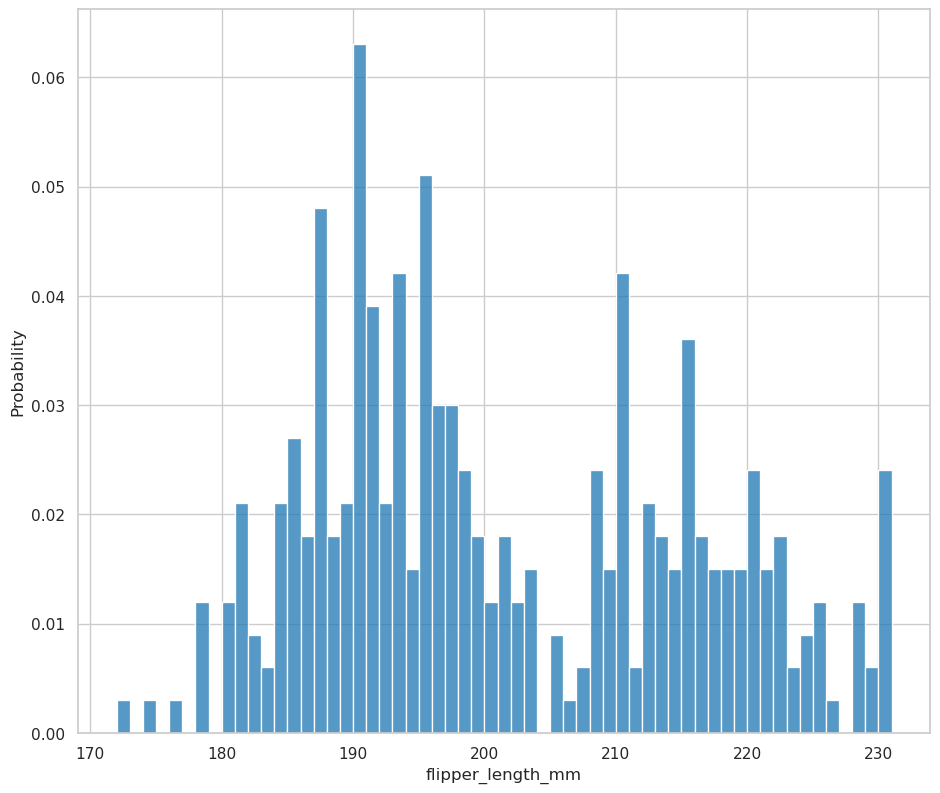

In [137]:
sns.histplot(data=processed_penguins_df, x='flipper_length_mm', binwidth=1, stat='probability')

#### Empiricaldist

In [139]:
pmf_flipper_length_mm=empiricaldist.Pmf.from_seq(processed_penguins_df.flipper_length_mm, normalize=True)

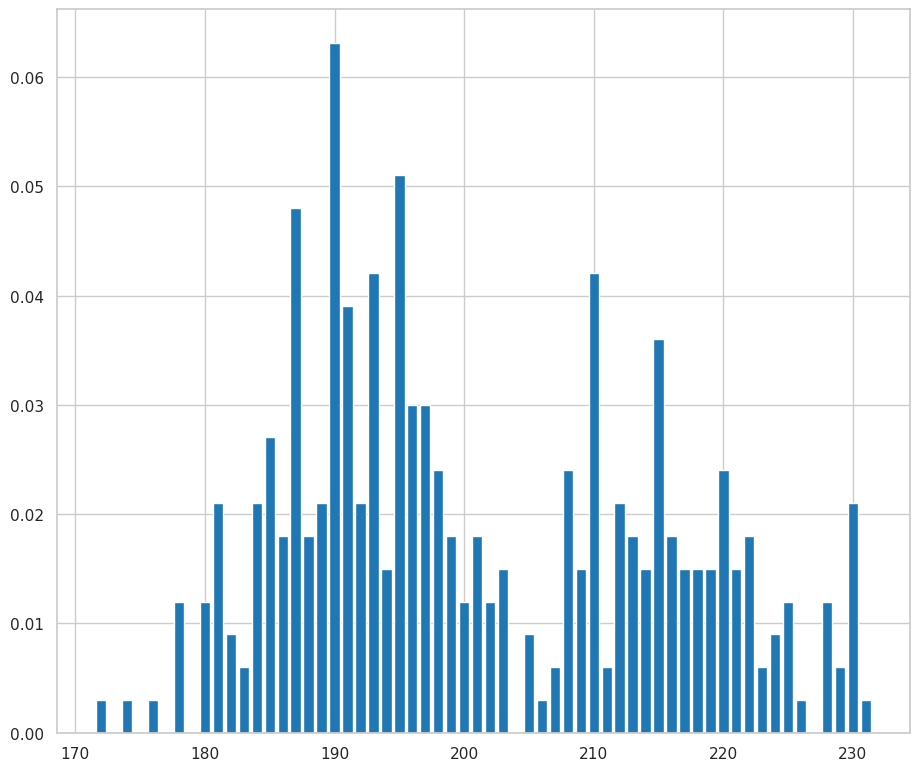

In [145]:
pmf_flipper_length_mm.bar()

### Funciones de acumulación

#### Seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

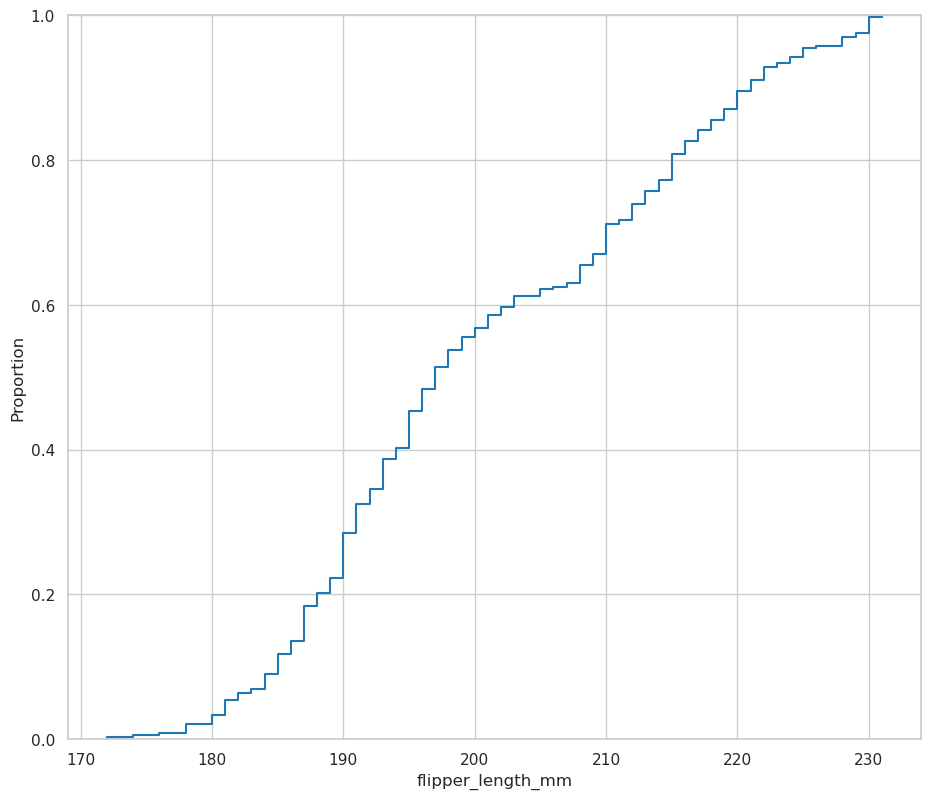

In [146]:
sns.ecdfplot(data=processed_penguins_df, x='flipper_length_mm')

#### Empiricaldist

In [147]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(processed_penguins_df.flipper_length_mm, normalize=True)

<Axes: xlabel='flipper_length_mm'>

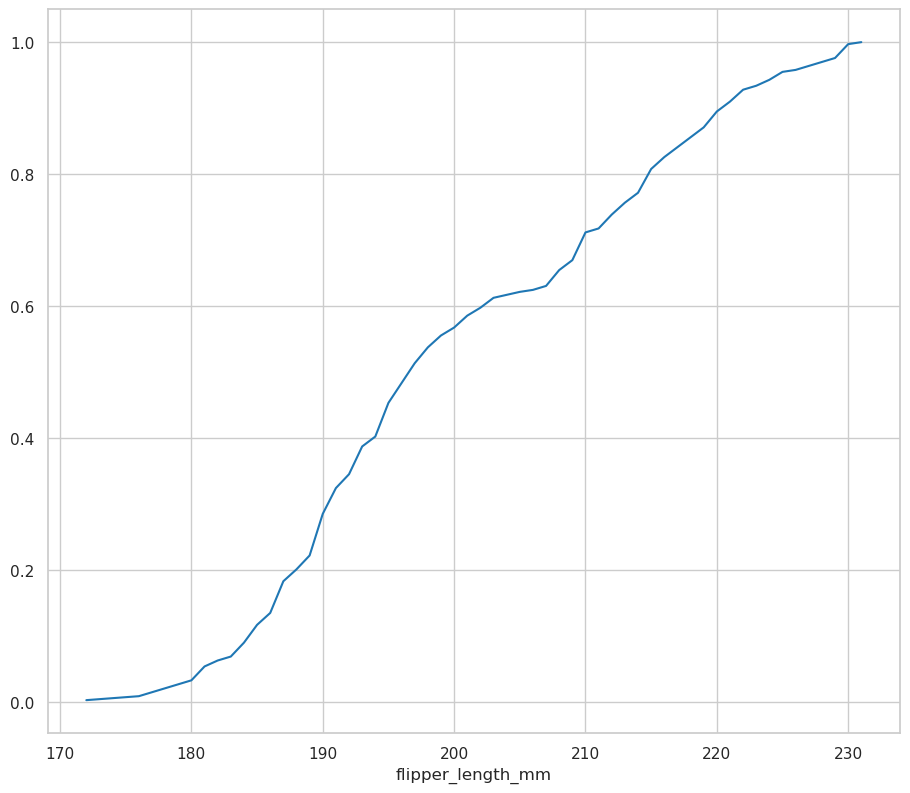

In [148]:
cdf_flipper_length_mm.plot()

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

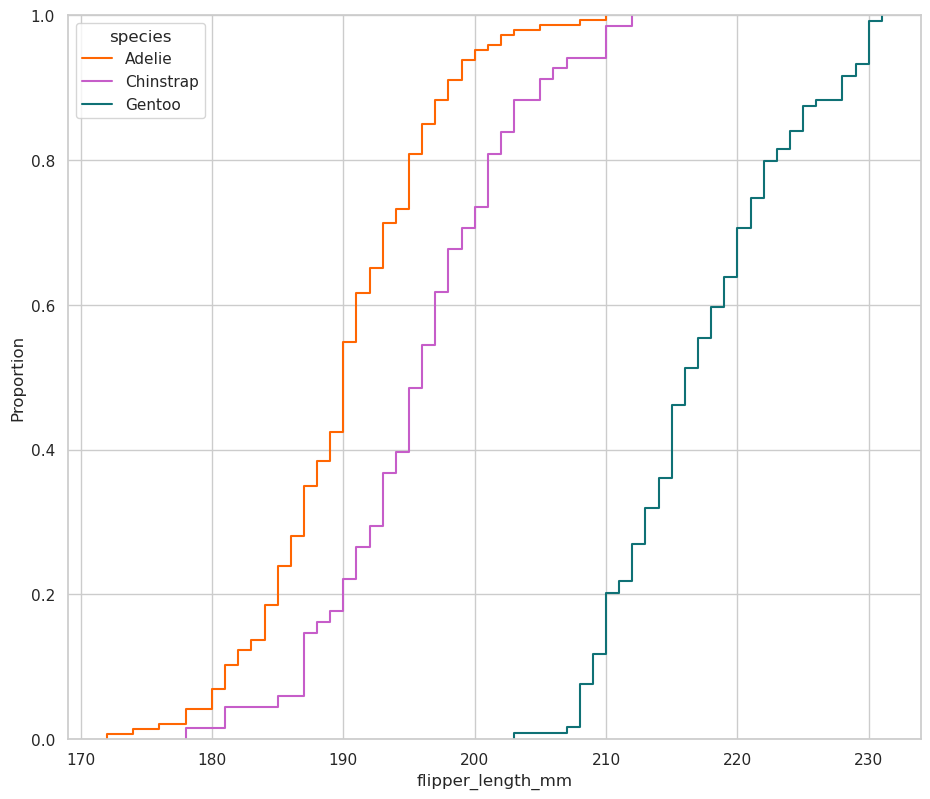

In [149]:
sns.ecdfplot(data=processed_penguins_df,x='flipper_length_mm',hue='species', palette=penguin_color)

## Funciones de densidad de probabilidad

In [151]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(data=None, *, x=None, y=None, hue=None, weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.

    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analogous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.

    The approach is explained further in the :ref:`user guide <tutorial_kde>`.

    Relative to a histogram, KDE can produce a plot that is less cluttered and
    more interpretable, especially when drawing mu

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

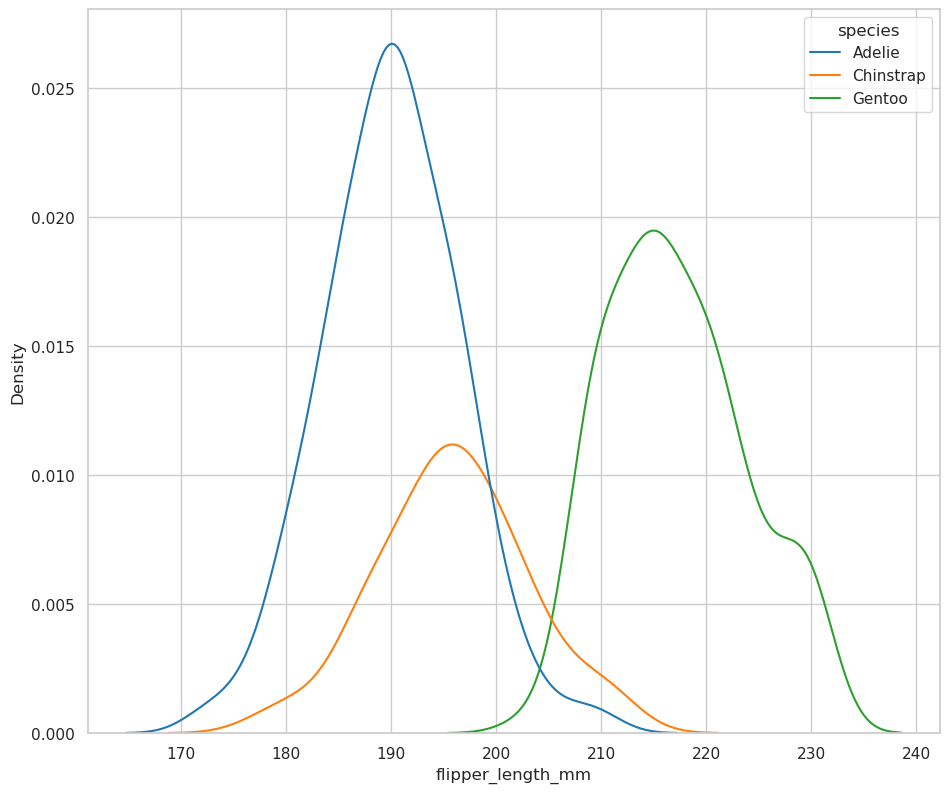

In [157]:
sns.kdeplot(data=processed_penguins_df, x='flipper_length_mm', hue='species')

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

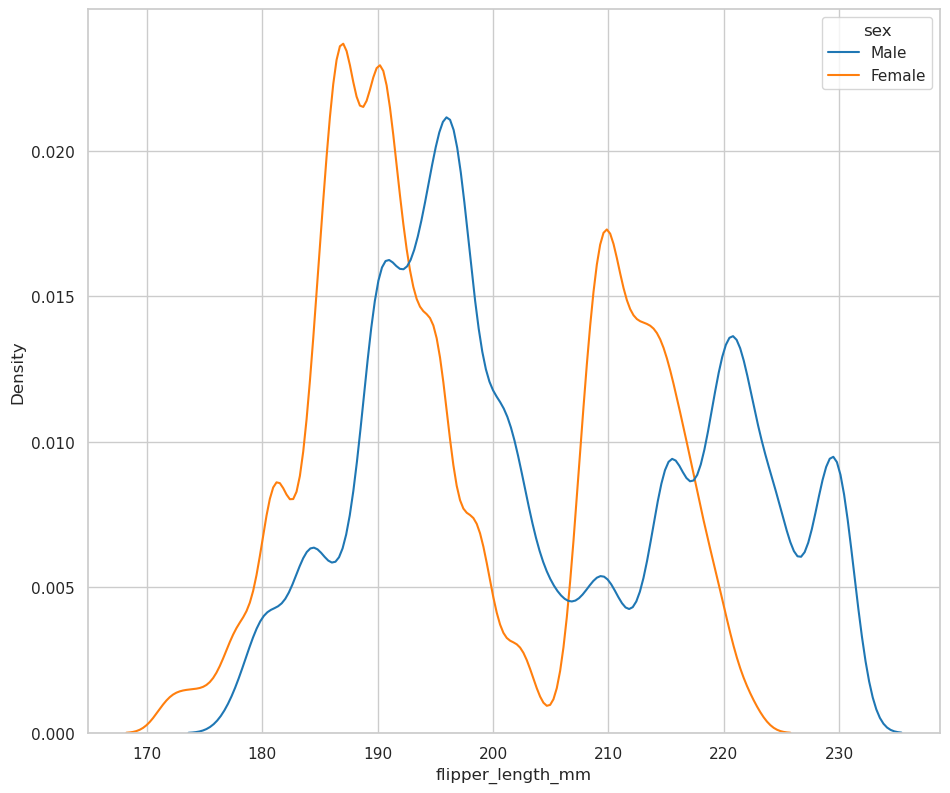

In [165]:
sns.kdeplot(data=processed_penguins_df, x='flipper_length_mm', hue='sex', bw_method=0.1)

<Axes: xlabel='body_mass_g'>

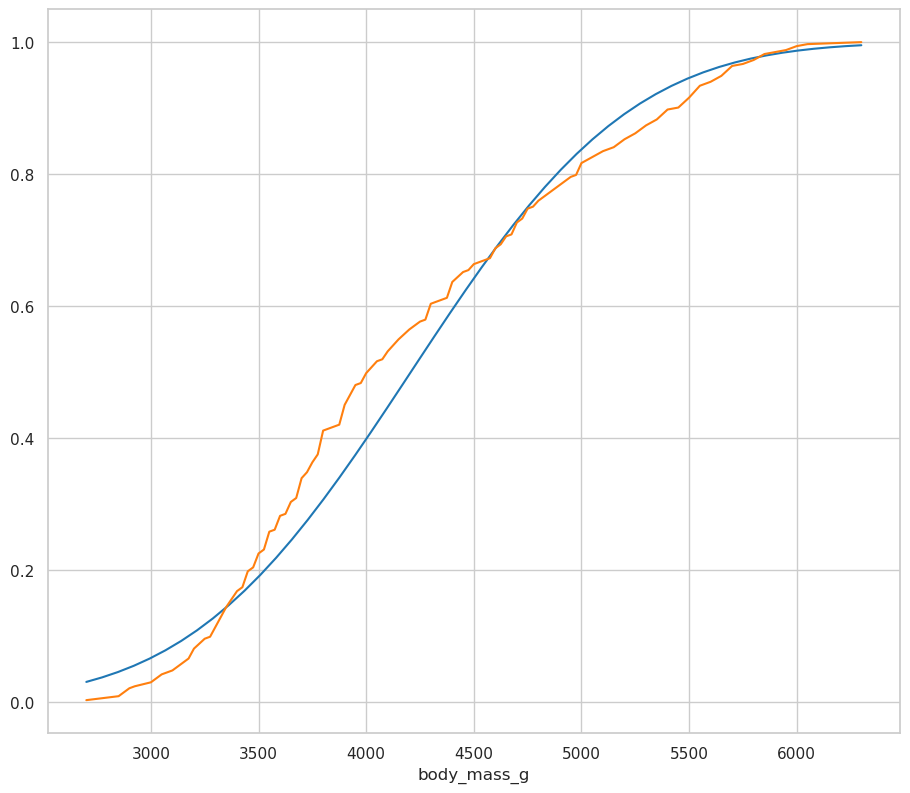

In [181]:
masa=processed_penguins_df.body_mass_g

xs = np.linspace(masa.min(), masa.max())
ys = scipy.stats.norm(masa.mean(), masa.std()).cdf(xs)

plt.plot(xs,ys)
empiricaldist.Cdf.from_seq(processed_penguins_df.body_mass_g, normalize=True).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

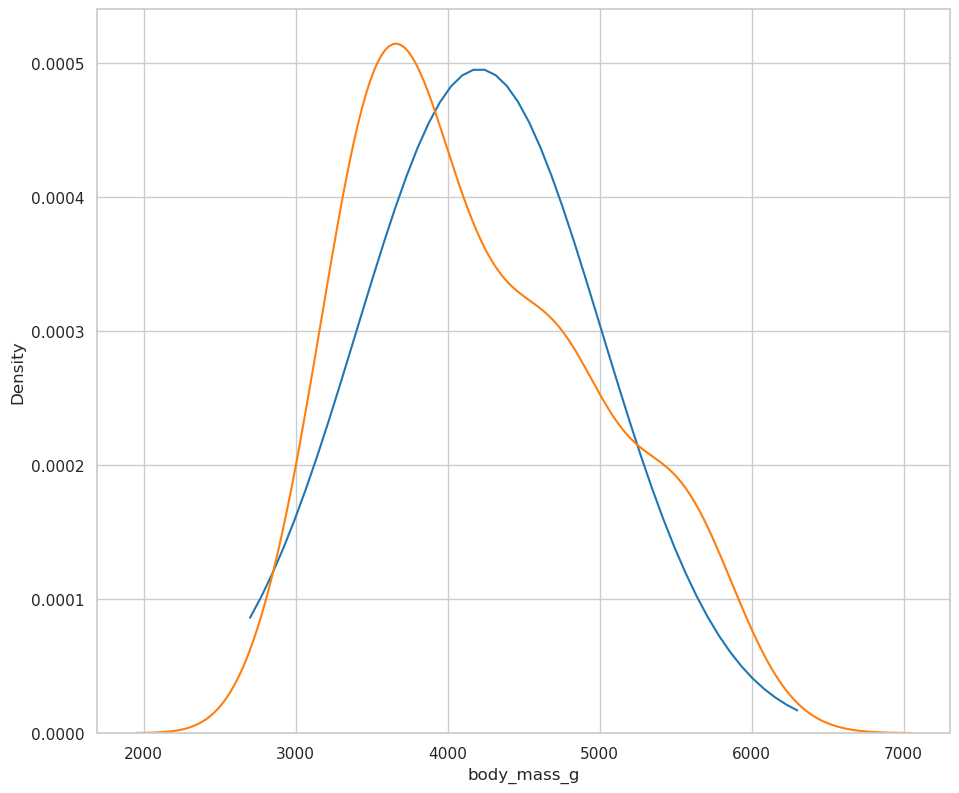

In [184]:
masa=processed_penguins_df.body_mass_g

xs = np.linspace(masa.min(), masa.max())
ys = scipy.stats.norm(masa.mean(), masa.std()).pdf(xs)

plt.plot(xs,ys)
sns.kdeplot(data=preprocessed_penguins_df, x='body_mass_g')

## Estableciendo relaciones

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

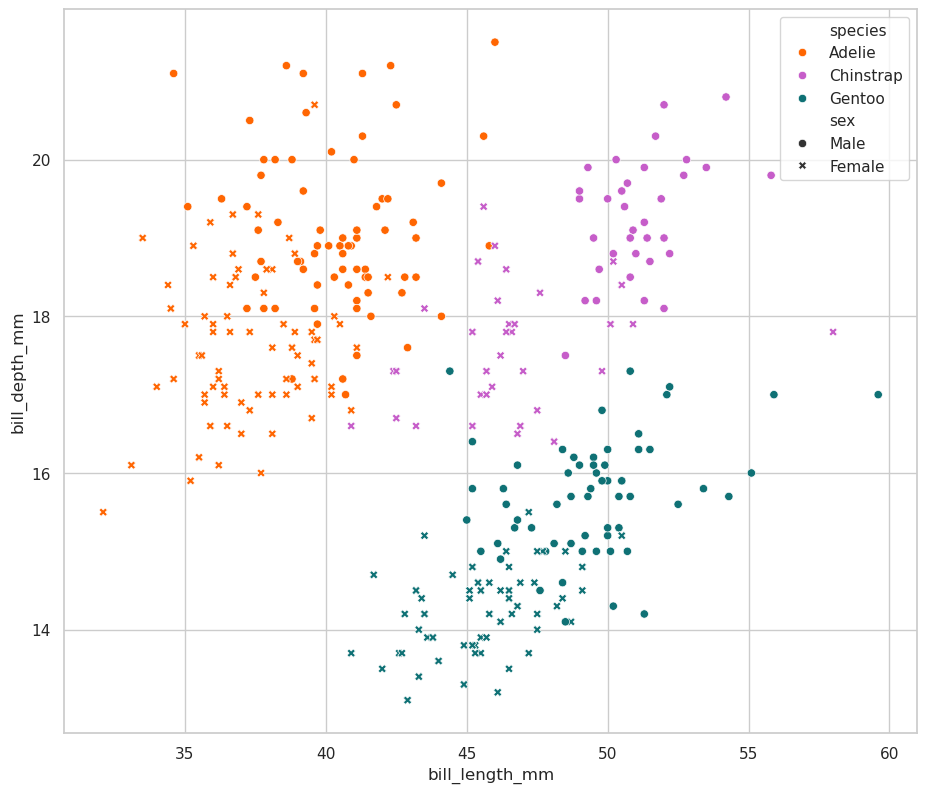

In [192]:
sns.scatterplot(data=processed_penguins_df, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=penguin_color, style='sex')

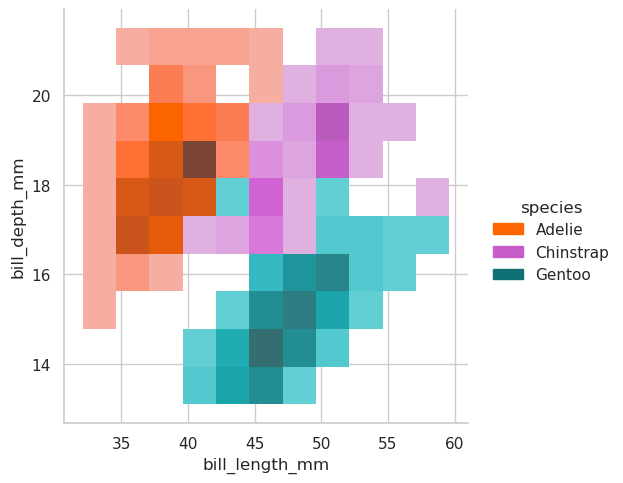

In [193]:
sns.displot(data=processed_penguins_df, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=penguin_color)

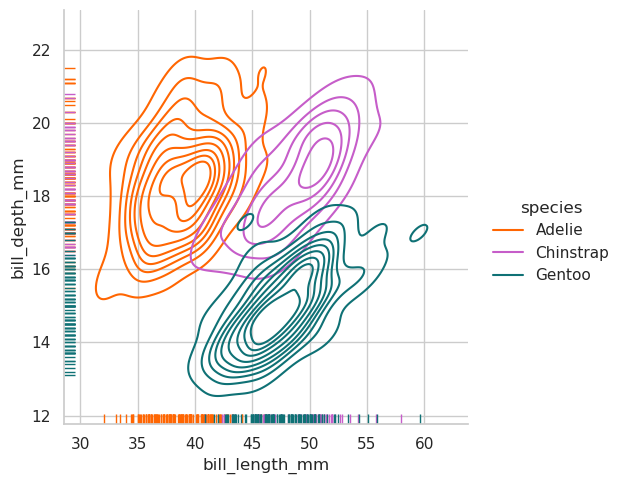

In [194]:
sns.displot(data=processed_penguins_df, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=penguin_color, rug=True, kind='kde')

<Axes: xlabel='species', ylabel='flipper_length_mm'>

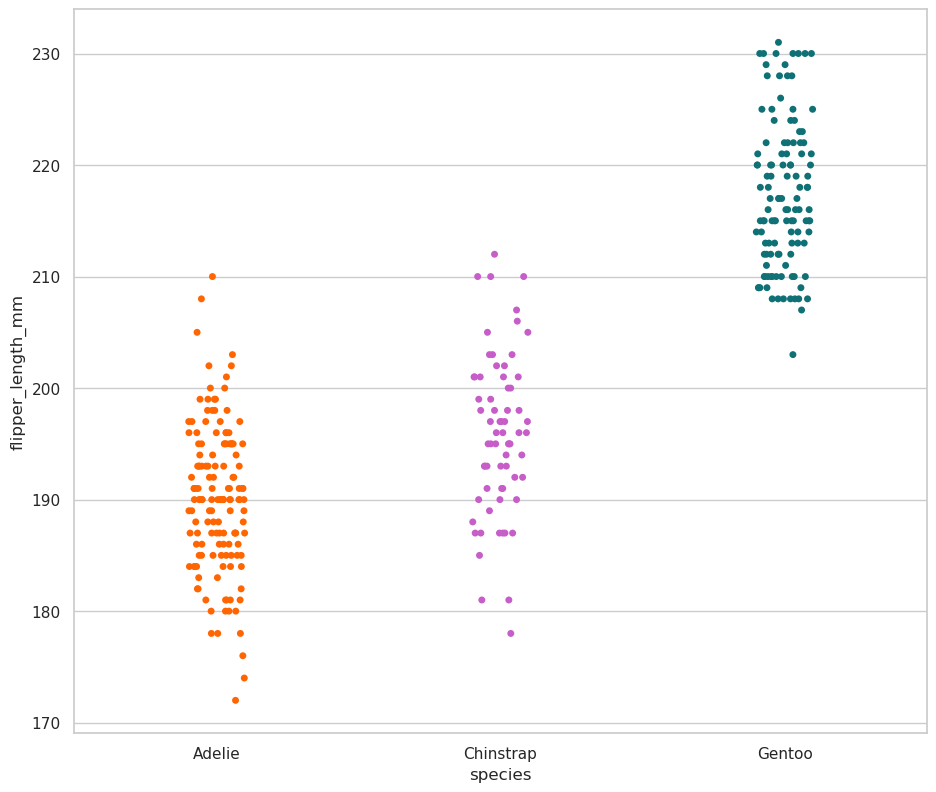

In [196]:
sns.stripplot(data=processed_penguins_df, x='species', y='flipper_length_mm', hue='species', palette=penguin_color)

/tmp/ipykernel_14006/530499577.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


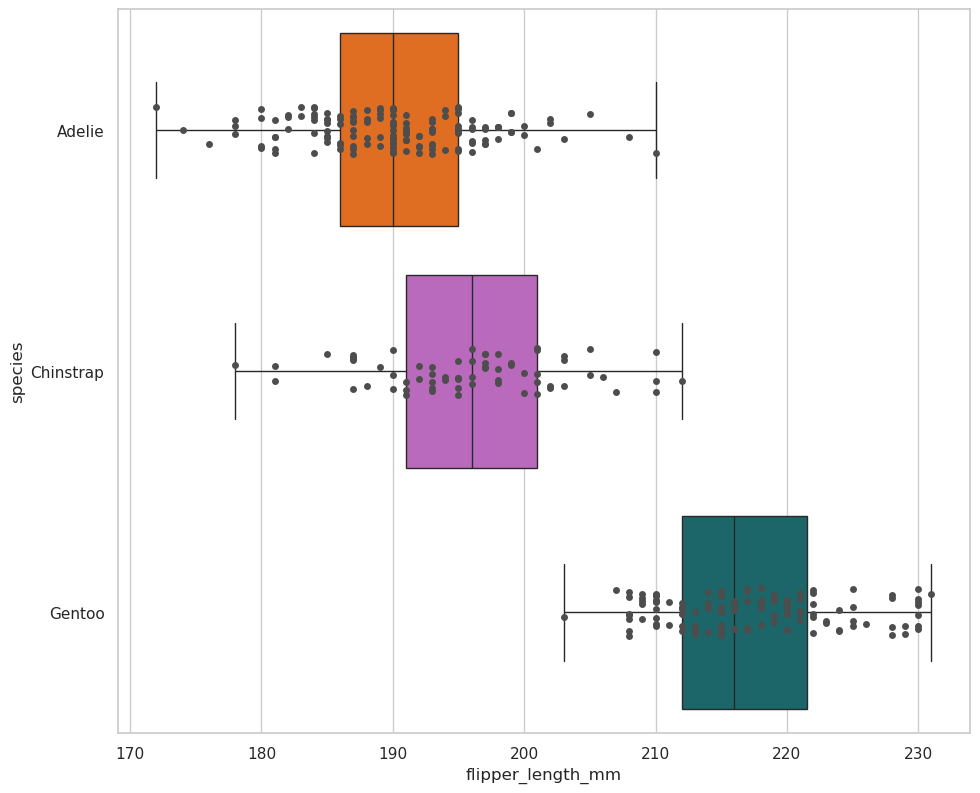

In [197]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color,
    whis=np.inf
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
)

/tmp/ipykernel_14006/1926847696.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(


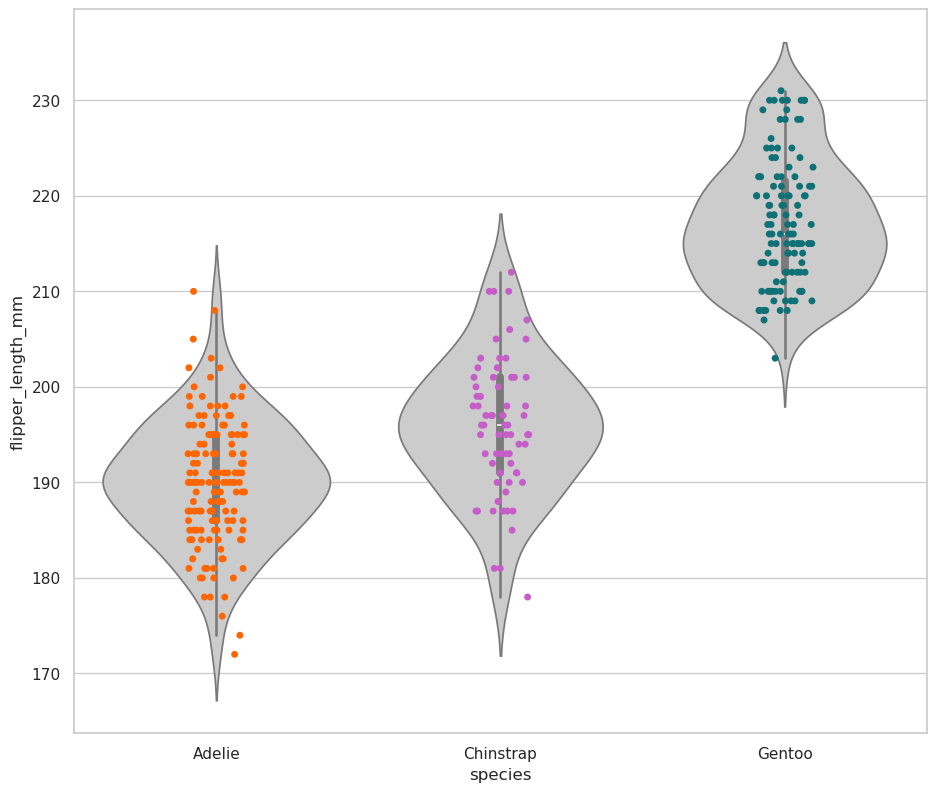

In [198]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

## Estableciendo Relaciones

In [201]:
processed_penguins_df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

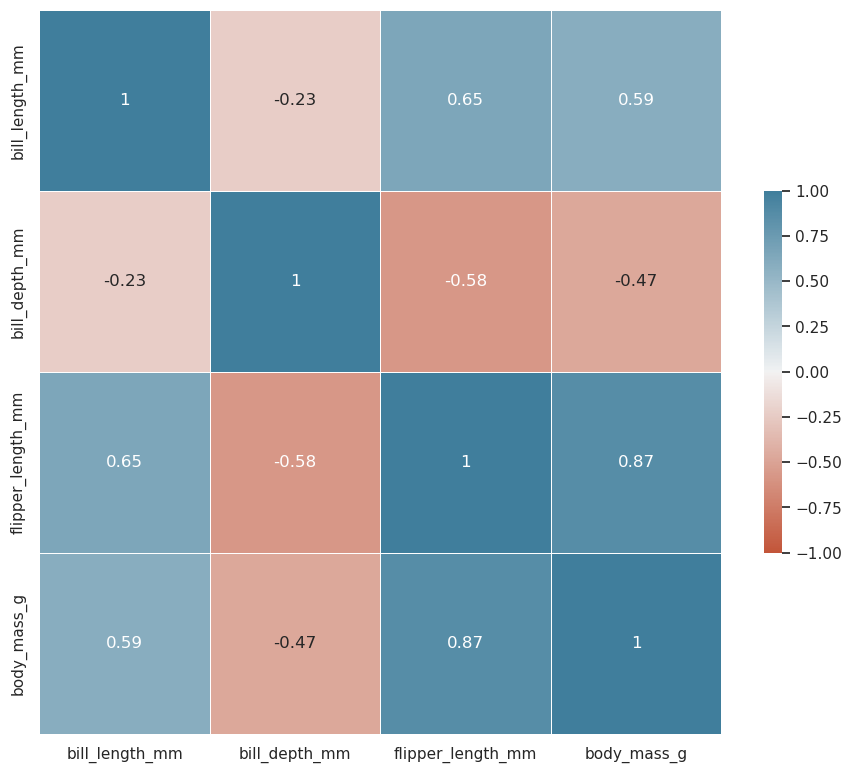

In [211]:
sns.heatmap(data=processed_penguins_df.corr(numeric_only=True), cmap=sns.diverging_palette(20, 230, as_cmap=True), center=0, vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True)

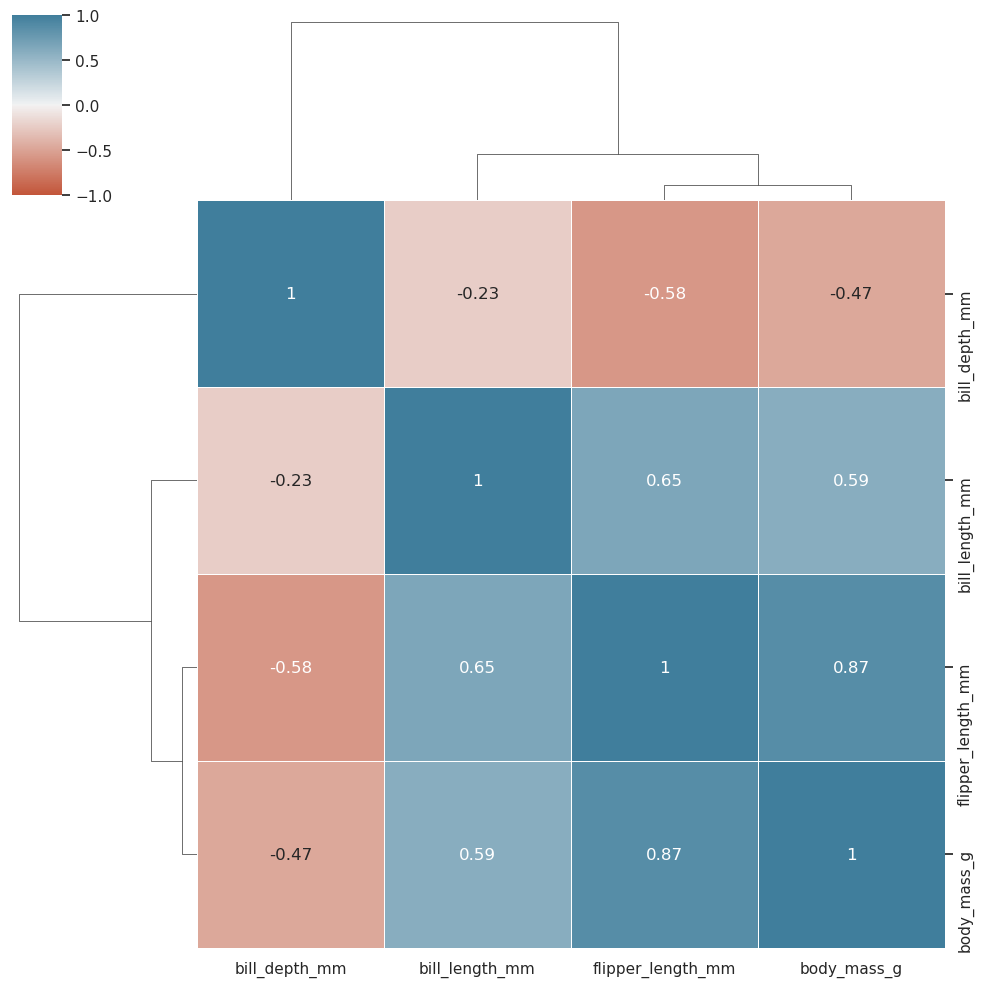

In [213]:
sns.clustermap(data=processed_penguins_df.corr(numeric_only=True), cmap=sns.diverging_palette(20, 230, as_cmap=True), center=0, vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True)


## Limitantes de la correlación lineal

array([[1.        , 0.04406987],
       [0.04406987, 1.        ]])

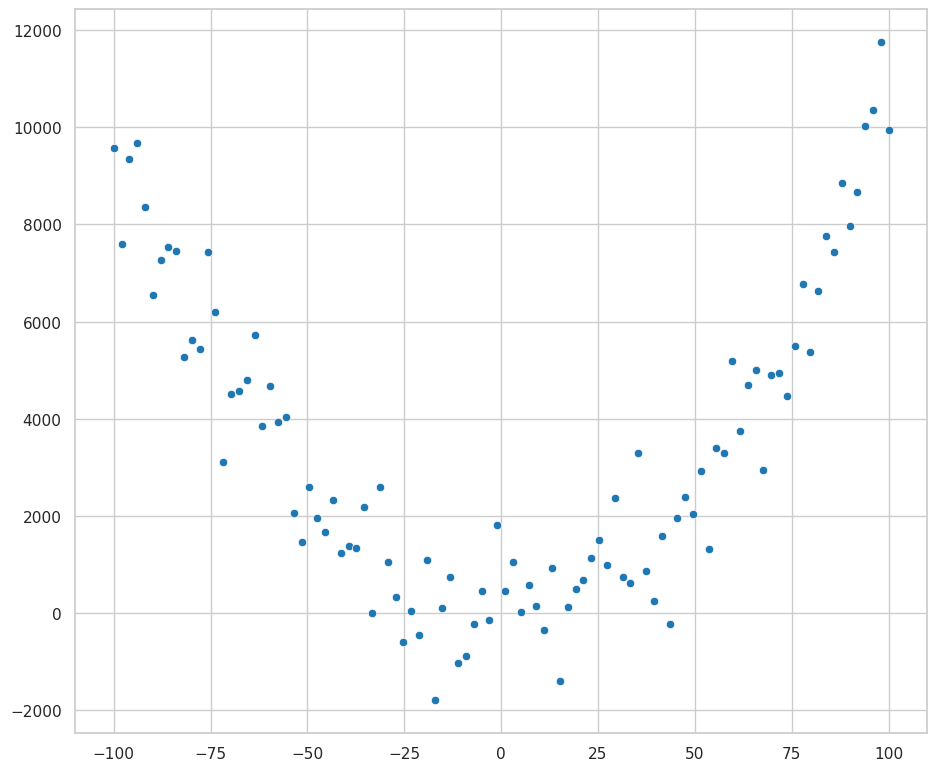

In [214]:
x = np.linspace(-100, 100, 100)
y = x ** 2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

Es claro que existe una correlación, pero como no es linea, los coeficientes son muy bajos.

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


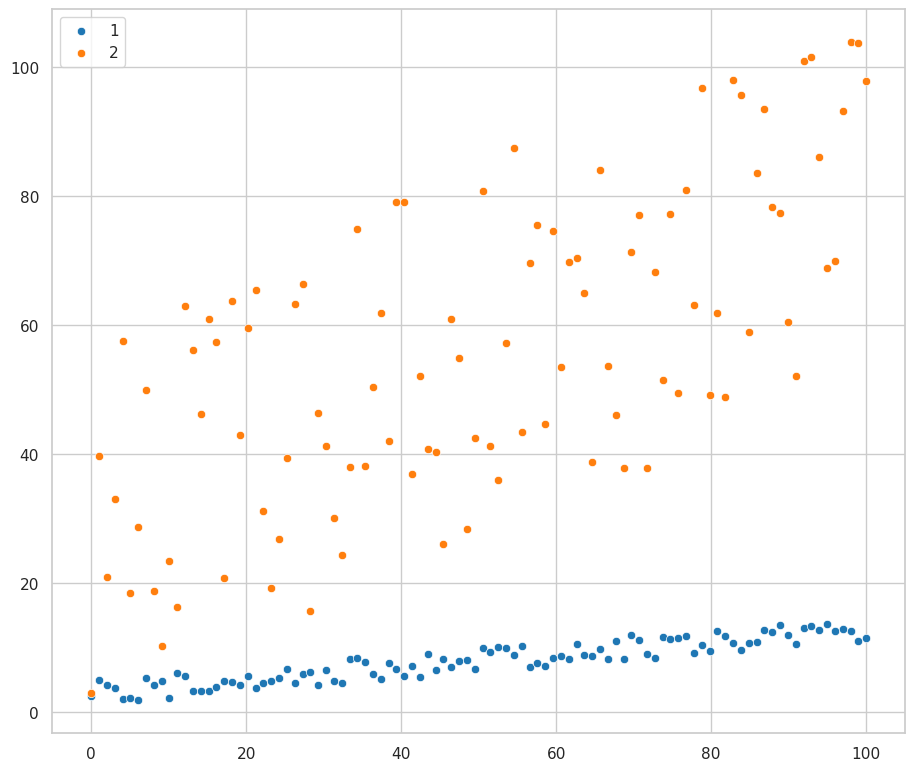

In [215]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

La relación azul indica una correlacion lineal muy buena, pero la pendiente de esa recta es casi despreciable, la relación es poco relevante. Mientras que para la relación naranja el coeficiente de correlación lineal es mas bajo pero la relación lineal entre las dos variables es mucho pas pronunciada.

## Análisis de regresión simple

In [218]:
res_1 = scipy.stats.linregress(x=x_1, y=y_1)
res_2 = scipy.stats.linregress(x=x_2, y=y_2)

print(res_1, res_2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


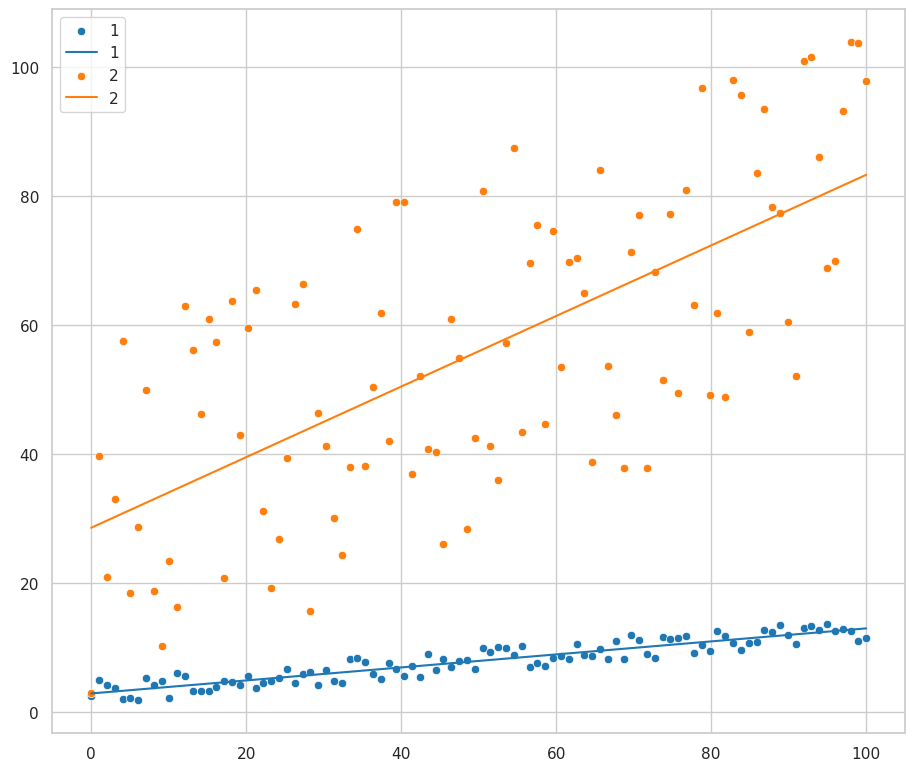

In [219]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 =  res_1.intercept + res_1.slope *  fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 =  res_2.intercept + res_2.slope *  fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

LinregressResult(slope=-0.08232675339862287, intercept=20.78664866843383, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409803)


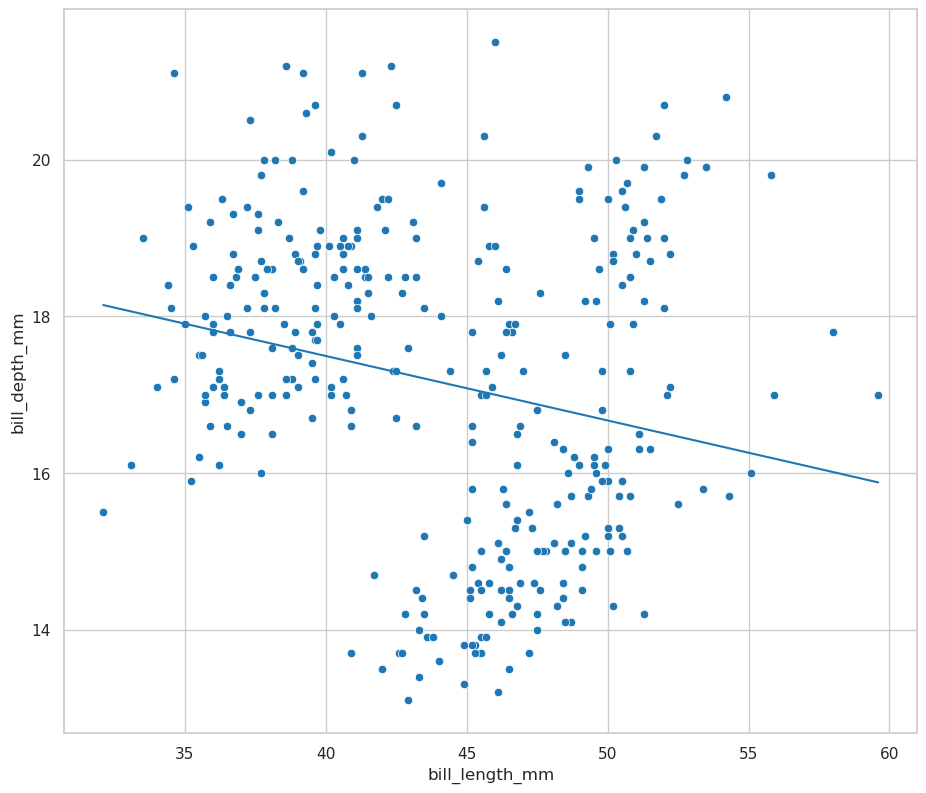

In [220]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins = scipy.stats.linregress(x=processed_penguins_df.bill_length_mm, y=processed_penguins_df.bill_depth_mm)
print(res_penguins)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 =  res_penguins.intercept + res_penguins.slope *  fx_1

plt.plot(fx_1, fy_1)

zzz

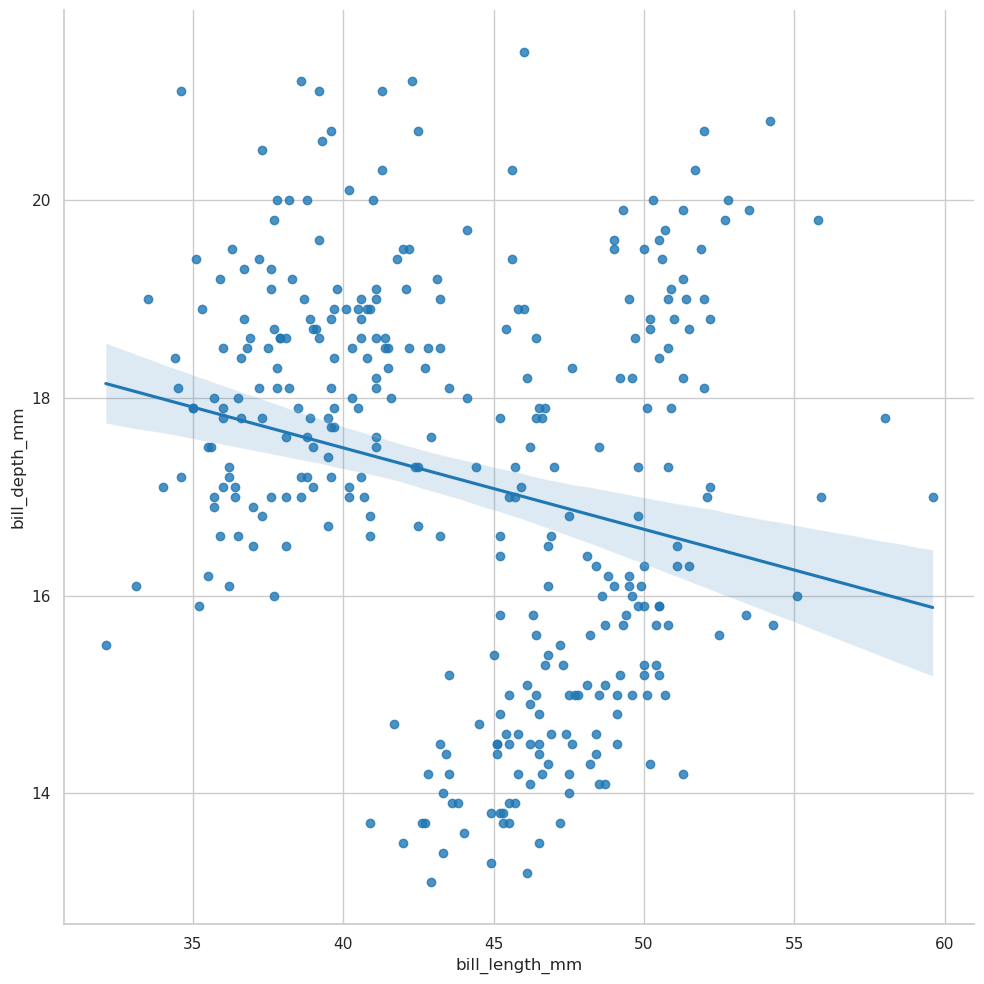

In [222]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

## Análisis de regresión multiple

In [223]:
model_1 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.54e-32
Time:                        21:44:04   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
model_2 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm ",
         data=processed_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 05 May 2024   Prob (F-statistic):           7.04e-46
Time:                        21:45:04   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
model_3 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sun, 05 May 2024   Prob (F-statistic):          9.26e-103
Time:                        21:45:49   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
model_4 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sun, 05 May 2024   Prob (F-statistic):          6.28e-122
Time:                        21:46:45   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.Male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [227]:
model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sun, 05 May 2024   Prob (F-statistic):          3.53e-118
Time:                        21:47:03   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.Male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [228]:
models_results = pd.DataFrame(
    dict(
        actual_value=processed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=processed_penguins_df.species,
        sex=processed_penguins_df.sex
    )
)

models_results

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,Male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,Female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,Female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,Female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,Male
...,...,...,...,...,...,...,...,...
338,4925.0,4485.416214,4951.159375,4817.401804,4730.939522,4643.885279,Gentoo,Female
340,4850.0,4450.699510,4833.930015,4877.548625,4719.043886,4690.867454,Gentoo,Female
341,5750.0,4763.149845,4899.545411,5269.708799,5402.946434,5367.592935,Gentoo,Male
342,5200.0,4311.832695,4641.476223,4728.911846,4563.248182,4549.920929,Gentoo,Female


<Axes: ylabel='Proportion'>

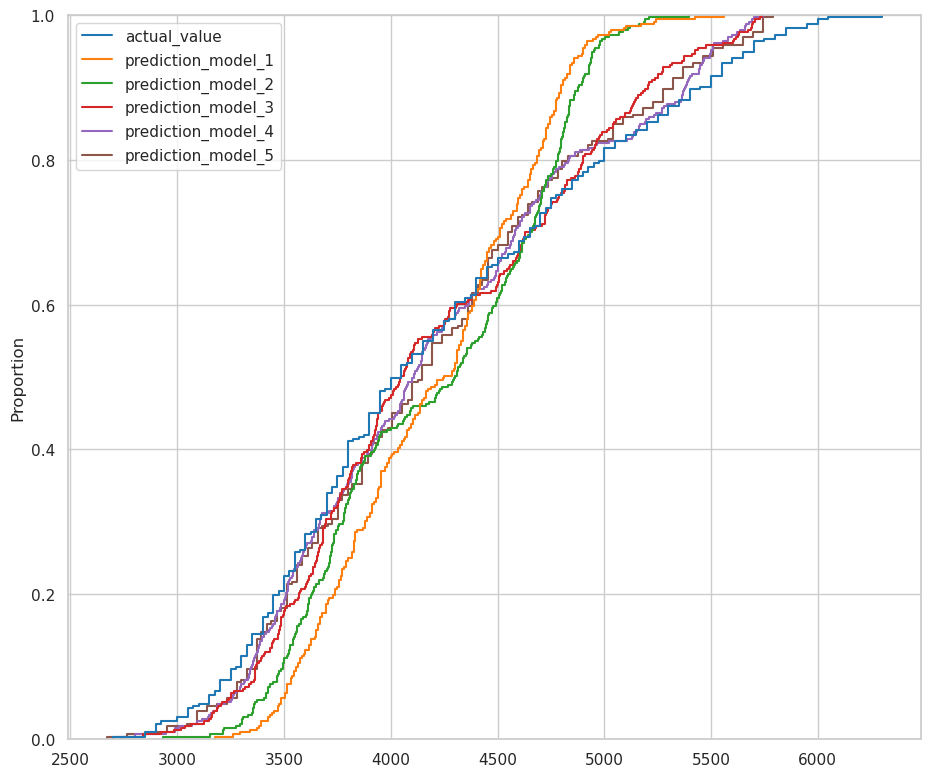

In [231]:
sns.ecdfplot(
    data=models_results#.select_columns(['actual_value', 'prediction_model_5'])
)

<Axes: ylabel='Density'>

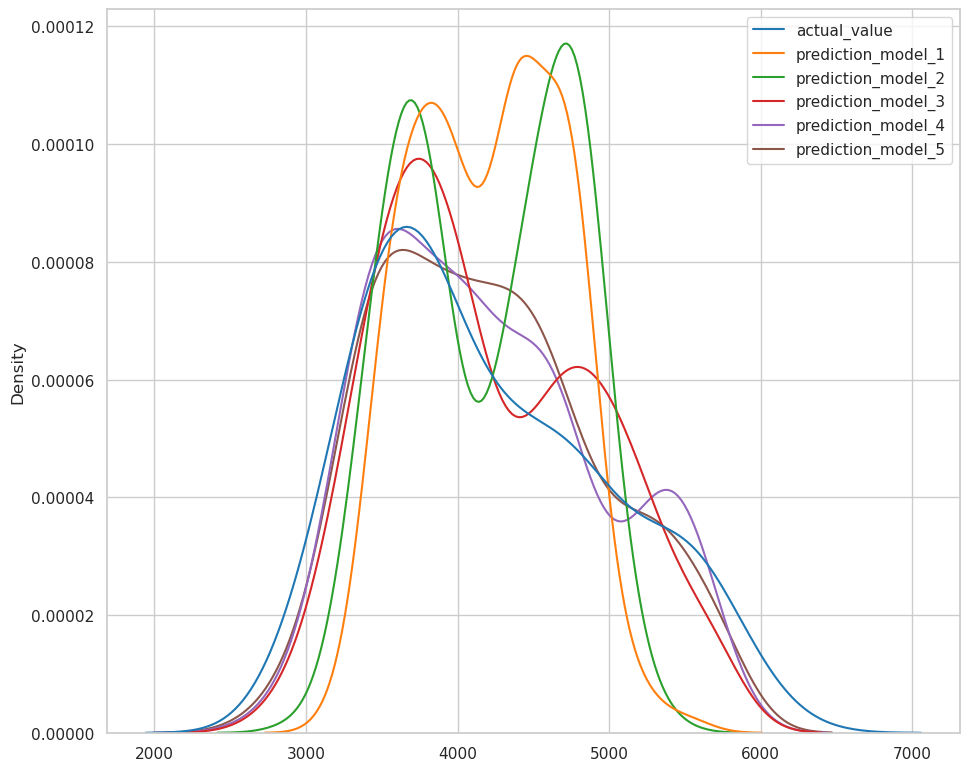

In [232]:
sns.kdeplot(
    data=models_results,
    cumulative=False
)

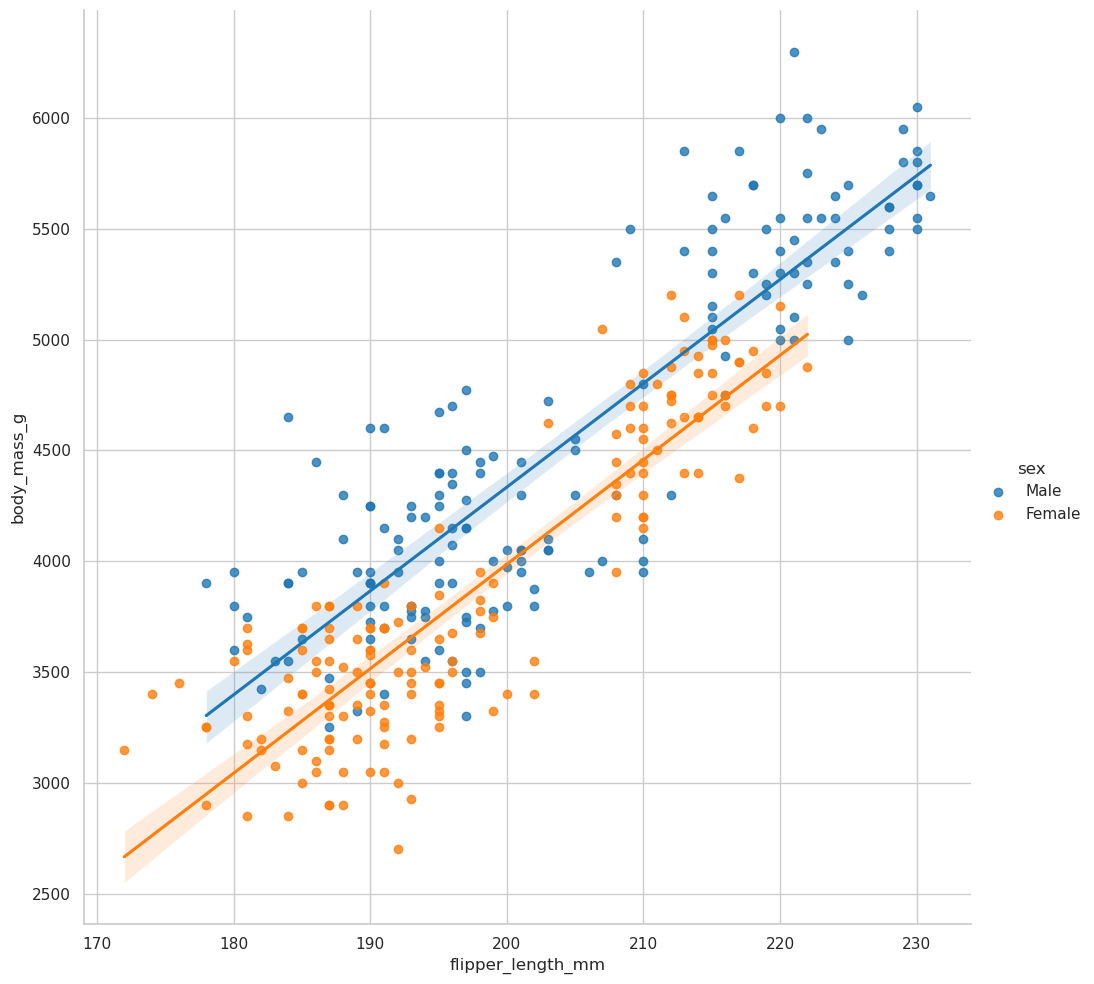

In [235]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    height=10,
    hue='sex'
)

## Paradoja de Simpson

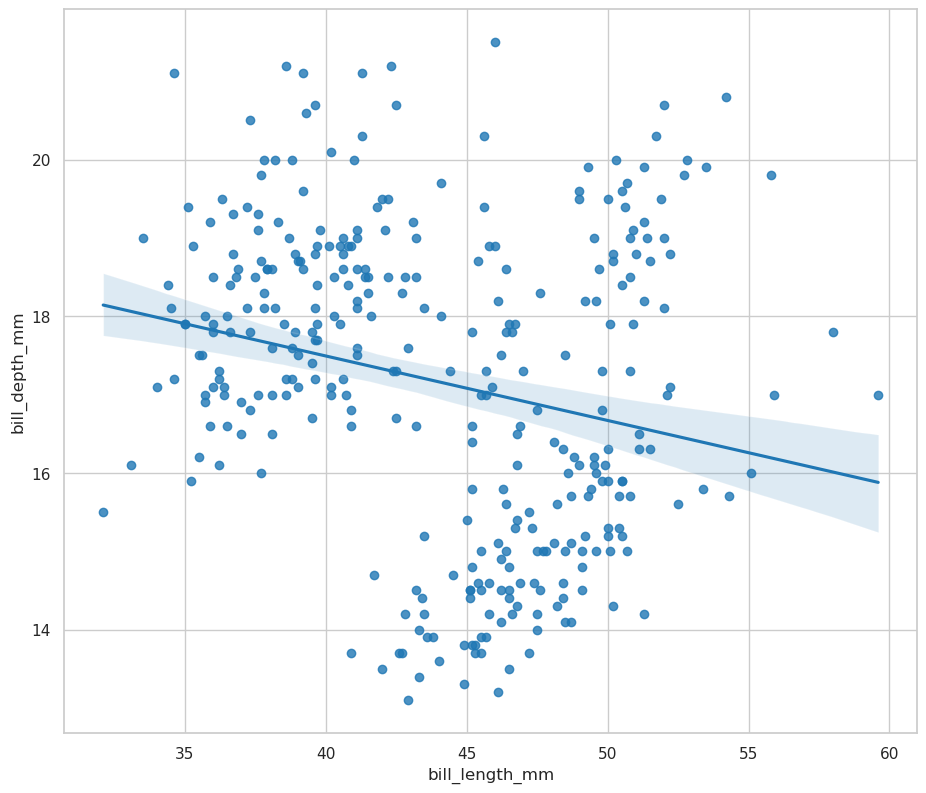

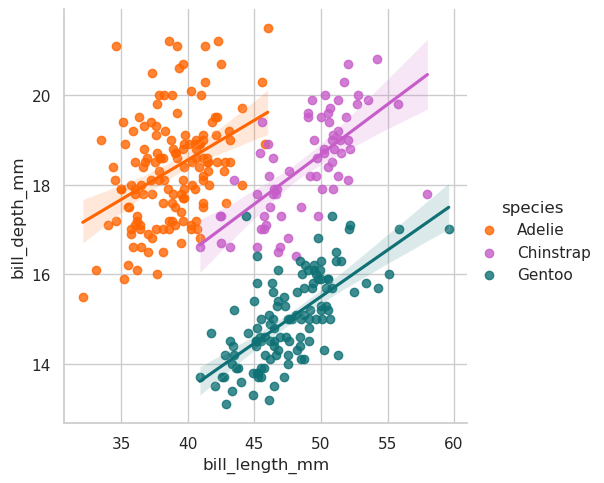

In [277]:
sns.regplot(data=processed_penguins_df, x='bill_length_mm', y='bill_depth_mm')
sns.lmplot(data=processed_penguins_df, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=penguin_color)